# Predicting Player Subcription Status: DSCI Project Final Report

<b> project-005-42: Dilna Davi, Jacob Didier, Ruoxi Qu, Matthew Tang </b>

This dataset is about a generative AI research data collection project involving a MineCraft external site serverLink that collects data about how users interact with video games. With this dataset, one can examine the traits predictive to game-related newsletter subscription, demand forecasting and the demographics of players involved. 
In this report, we explore the relationship between a player’s age and the total hours spent on the server, assessing whether these factors can predict subscription status for a gaming newsletter. We will wrangle and clean the data, visualize key patterns, and build predictive models with KNN Classification to answer this question.


<b>Question:</b> Can a player's age and the number of total hours they have spent on the server predict their subscription status for a gaming newsletter?

The dataset of interest is the players.csv data provided by the Computer Science department. This particular dataset has 7 variables with a total of 196 observations. The description and type of each variable present is given below.

| Variable    | Type | Description |
| -------- | ------- |------- |
| experience  | Character | Experience of the player.   |
| subscribe | Logical | Whether the player is subscribed to the game-related newsletter.     |
| hashedEmail | Character| Email of the player, hashed for privacy.     |
| played_hours | Double | Time in hours the player has spent on the game.     |
| name | Character | First name of the player.     |
| gender | Character | Gender of the player.     |
| Age | Integer | Age of the player.     |


The question of interest was formulated through careful analysis of the players.csv dataset explained below. Through plots, relationships between different variables against subscription status could be visualized and patterns could be studied. We will import a library package to begin. 

In [1]:
## import the libraries
library(tidyverse) # for exploratory data analysis

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


With the package imported, we will read the data through a remote repository link, allowing the data to be observed and analyzed by multiple users. With a working URL, the analysis can be run on any local computer, independent of directories. To do this, we read the comma-separated file and can observe portions of the data.

In [2]:
## load players.csv data into R
url <- "https://raw.githubusercontent.com/dilnadavi/DSCI100Project/main/data/players.csv"
players_data <- read.csv(url)
head(players_data)
tail(players_data)

,experience,subscribe,hashedEmail,played_hours,name,gender,Age
,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
1,Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
2,Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
3,Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
4,Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
5,Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
6,Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


,experience,subscribe,hashedEmail,played_hours,name,gender,Age
,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
191,Amateur,TRUE,644fe4200c19a73768b3fa598afcbd0948f7557925b7f17166285da23af31cc6,0.0,Rhys,Male,20
192,Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
193,Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
194,Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
195,Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
196,Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


It is vital that our dataset is tidy in order to avoid one-time approaches that result in difficulty for reiteration and reuse. We see that this dataset generally meets the tidy requirements as each column is a variable, each row is an observation and each cell forms a single measurement. However, looking at the last observation, we see that the value for the age is missing.

In [3]:
players_NA <- players_data |> filter(is.na(Age))
players_NA

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
Regular,TRUE,7d71c49cbbce8dcf0276b2bfecfa2d16f22cb31a4024556d6085884298f2ee8d,0.1,Devin,Two-Spirited,NA
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


The decision to remove rows with missing measurements is a complicated process, as missing information itself can be a useful observation. However, as shown above, there are only two rows with missing measurements for age, and thus, its removal will make further data analysis, such as computing summary statistics, more manageable, while also not having an immense impact on the integrity of our data. Below, we wrangle the data to remove these observations. Here, we will also take a step ahead and transform subscribe as a factor for classification, as data of type LOGICAL can not be classified.

In [4]:
## wrangle the data
wrangled_players_data <- players_data |> drop_na(Age) |> mutate(subscribe = as.factor(subscribe))
tail(wrangled_players_data)

,experience,subscribe,hashedEmail,played_hours,name,gender,Age
,<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<int>
189,Amateur,FALSE,514ebbaa30f0d162127e065ab780892b7930cf8d75944d5eb09c91c02d6026c7,0.0,Orion,Male,17
190,Amateur,TRUE,644fe4200c19a73768b3fa598afcbd0948f7557925b7f17166285da23af31cc6,0.0,Rhys,Male,20
191,Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
192,Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
193,Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
194,Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


We can now explore the relationships between variables of interest. We hypothesize that those who have played more hours are more likely to subscribe to the game newsletter based on interest. To see if this assumption holds, we can calculate summary statistics about the average hours played for subscribed versus unsubscribed players. To have a stronger grasp of the relationship between player subscription status and the total number of hours played, we can create a plot to visualize patterns in the data. As we are observing a single quantitative  variable, a histogram is most appropriate. With the visualization, we can use the facet_grid() function to compare the count of subscribed versus unsubscribed players that fall into each bin.

subscribe,average_played_hours
<fct>,<dbl>
FALSE,0.5019231
TRUE,7.8830986


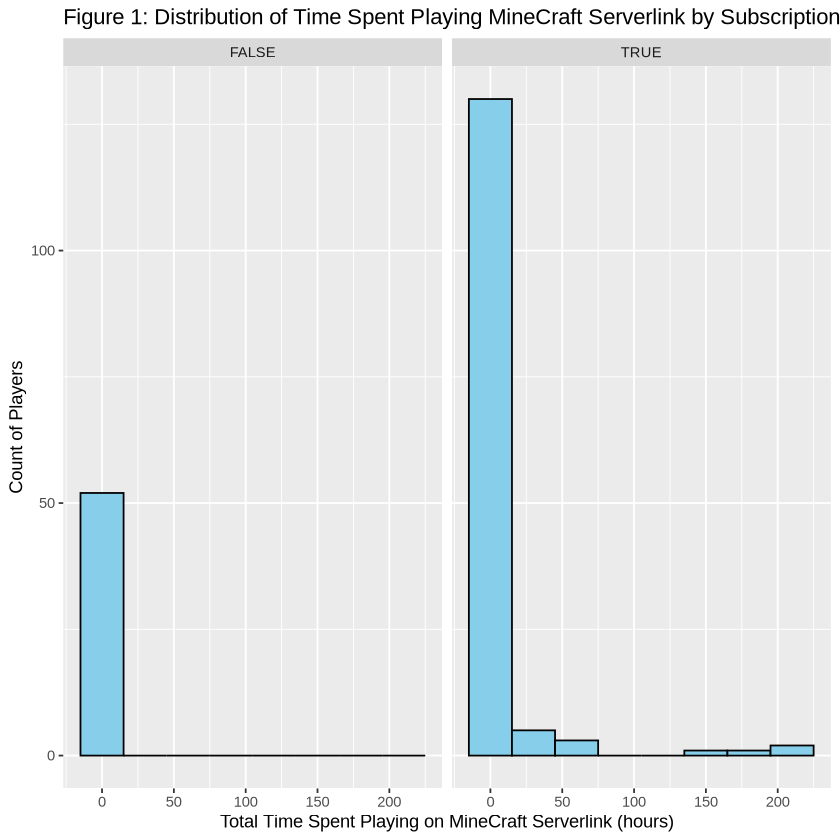

In [5]:
average_played_hours_per_subscribe <- wrangled_players_data |> group_by(subscribe) |> summarize(average_played_hours = mean(played_hours))
average_played_hours_per_subscribe
ggplot(wrangled_players_data, aes(x = played_hours)) +
  geom_histogram(binwidth = 30, fill = "skyblue", color = "black") +
  facet_grid(cols = vars(subscribe)) +
  labs(
    title = "Figure 1: Distribution of Time Spent Playing MineCraft Serverlink by Subscription Status",
    x = "Total Time Spent Playing on MineCraft Serverlink (hours)",
    y = "Count of Players"
  )

Here, we see that there is much more data pertaining to subscribed users as opposed to unsubscribed users, indicating an over-representation of subscribed users in the original dataset. However, we can also observe that the average total hours played for subscribed users is substantially greater by a factor of ~16 compared to unsubscribed players. Furthermore, there are no observations in the bins that exceed ~35 hours for unsubscribed players, while there are observations in the 100-200 total played hours for subscribed players -- this indicates that the range of total hours played is far greater for subscribed players, and one can observe that subscribed players seem to play more hours than unsubscribed players. This indicates that the number of hours played could potentially be a meaningful predictor for the subscription status of the player.

Though we can theoretically start creating our prediction model with the single predictor of hours played, it is rare that a single predictor can successfully classify data without bias. Thus, finding another predictor for the subscription status can potentially create a stronger model. Looking at our dataset, we can analyze whether a player's age has an effect on their decision to subscribe to a newsletter. To analyze any such patterns, we can again summarize the mean and visualize these two variables.

subscribe,average_age
<fct>,<dbl>
FALSE,22.98077
TRUE,19.61972


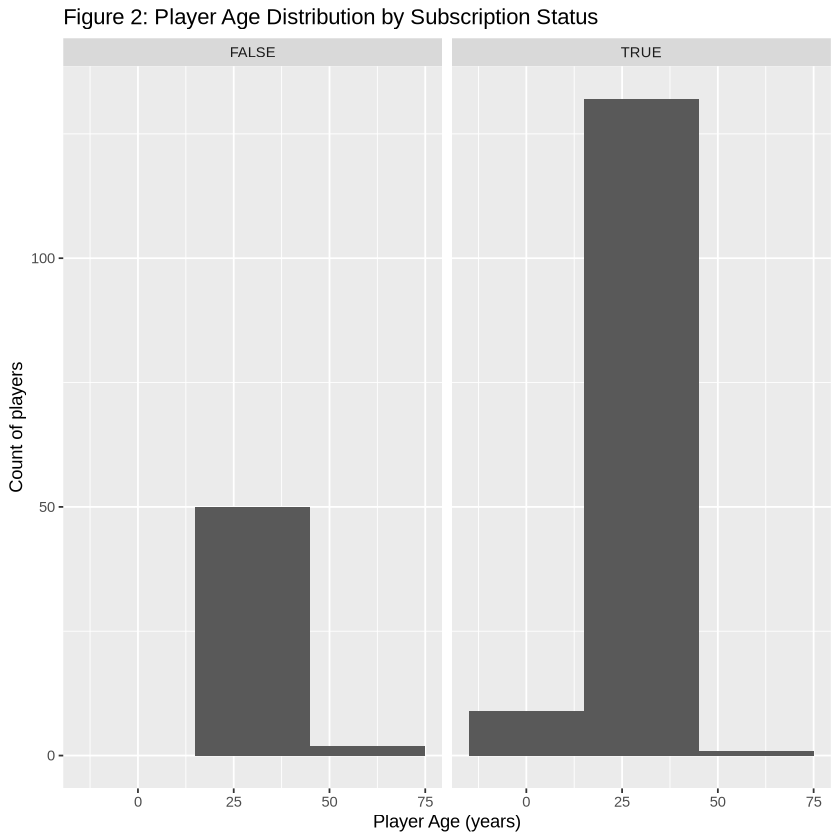

In [14]:
average_age_per_subscribe <- wrangled_players_data |> group_by(subscribe) |> summarize(average_age = mean(Age))
average_age_per_subscribe
ggplot(wrangled_players_data, aes(x = Age)) + 
  geom_histogram(binwidth = 30) + 
  facet_grid(cols = vars(subscribe)) +
  labs(
    title = "Figure 2: Player Age Distribution by Subscription Status",
    x = "Player Age (years)",
    y = "Count of players")

With the summary statistic, we see that the average age of unsubscribed players is ~22, whereas the average age for subscribed players is ~19. Moreover, we see that there is a substantial count of players falling into the younger-age bins for subscribed players as well, whereas there is no such observations for unsubscribed players. Thus, this analysis suggests that younger players are more likely to subscribe to the gaming newsletter, and thus, is a potential predictor for the player's subscription status.

It is important to address the class imbalance present. There is an overrepresentation of players that are subscribed to the newsletter as indicated by the higher frequency. This indicates that the algorithm is more likely to select TRUE due to the sheer density of the attribute. We can deal with the class imbalance observed by oversampling the rare class as shown below.

In [7]:
library(themis)

ups_recipe <- recipe(subscribe ~ ., data = wrangled_players_data) |>
  step_upsample(subscribe, over_ratio = 1, skip = FALSE) |>
  prep()

upsampled_players <- bake(ups_recipe, wrangled_players_data)

Loading required package: recipes


Attaching package: ‘recipes’


The following object is masked from ‘package:stringr’:

    fixed


The following object is masked from ‘package:stats’:

    step




Continuing with our analysis, our previous visualizations show that a player's age and total played hours have a strong potential to predict their subscription status. With balanced data, we can plot these two variables below.

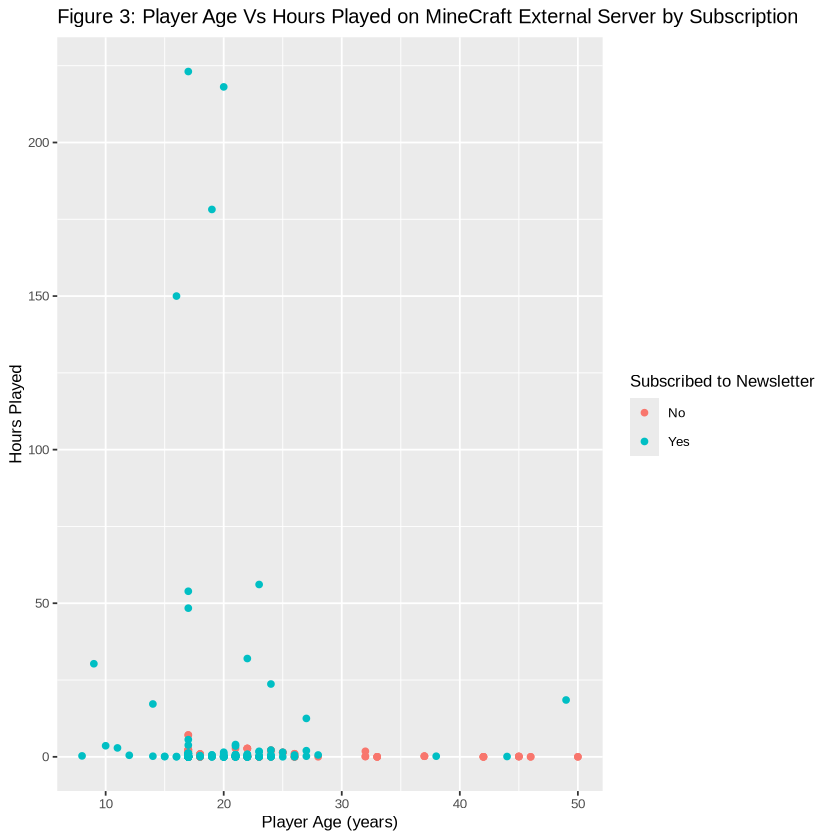

In [8]:
Hours_age_plot <- ggplot(upsampled_players, aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point(stat = "identity") +
    labs(x = "Player Age (years)", 
         y = "Hours Played", 
         color = "Subscribed to Newsletter") +
    theme(text = element_text(size = 10)) +
    ggtitle("Figure 3: Player Age Vs Hours Played on MineCraft External Server by Subscription") +
    scale_color_discrete(labels = c("No", "Yes"))

Hours_age_plot


In this graph, we visualize the separate observations we made prior. One can observe that most of the data is concentrated in the lower range of the x-axis, indicating that most players are young -- the majority of these points are also blue, indicating that young players are most likely to be subscribed to the newsletter. Furthermore, we also see that the points present in the upper range of the y-axis are blue, again suggesting that players with more hours are likely to be subscribed.

With this, we have two predictors for our subscription status prediction model. We will use the KNN Classification algorithm, as the classification of subscription is categorical. The K-Nearest Neighbours algorithm classifies observations through the k nearest points to the observation of interest. It is important to standardize the data as the classification is dependent on its distance to other points of the dataset, and the age value has a smaller range and higher center than hours played.

With the recipe, we can specify that the predictors are the number of total hours played and the age of the player. We saw that the majority of observations for total number of hours played is in the 0-20 hour bins in Figure 1, and Figure 2 shows that the center of age is in the 25+ range. Thus, we will scale and center our data in our recipe.

It is difficult to evaluate the performance of our model as we do not have the opportunity to collect new observations for testing. Therefore, we will split the original dataset into a training set for the creation of the model, and a testing set to evaluate performance. We can plot the predictive variables in our training set and compute the distance between each point to the new observation, choosing the k-nearest points. In this report, we have decided to do a 75/25 split for the training set and testing set respectively. To keep the random shuffling and splitting consistent, we will use set.seed(). Additionally, we will use cross-validation to evaluate the model's performance across multiple subsets of the dataset. K-fold cross-validation divides a dataset into subsets, allowing each subset to be used as both training and testing data at different stages. This method helps reduce overfitting and ensures our model generalizes well to unseen data.

In [9]:
# add library
library(tidymodels)

set.seed(4235)
players_split <- initial_split(upsampled_players, prop = 0.75, strata = subscribe)
players_training <- training(players_split)
players_testing <- testing(players_split)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/



In [10]:

players_recipe <- recipe(subscribe ~ played_hours + Age,
                        data = players_training) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

The KNN Classification algorithm requires the user to provide the value for k. We can use cross-validation to evaluate the accuracy for each specified k. To do this, we can create a specification for our model with the neighbors parameter set to tune().

In this report, we decided to do a 5-fold cross-validation, allowing our training data to be split into 5 folds. Furthermore, we will observe the accuracy for k values in the range [1,10] incrementing by 1. By combining it into a workflow with the specification and recipe defined earlier, the program will automatically split our training data into 5 folds and evaluate the accuracy of each value of k. To choose the most appropriate value, we can plot the accuracy against the number of neighbours and choose the value for k with the highest accuracy.

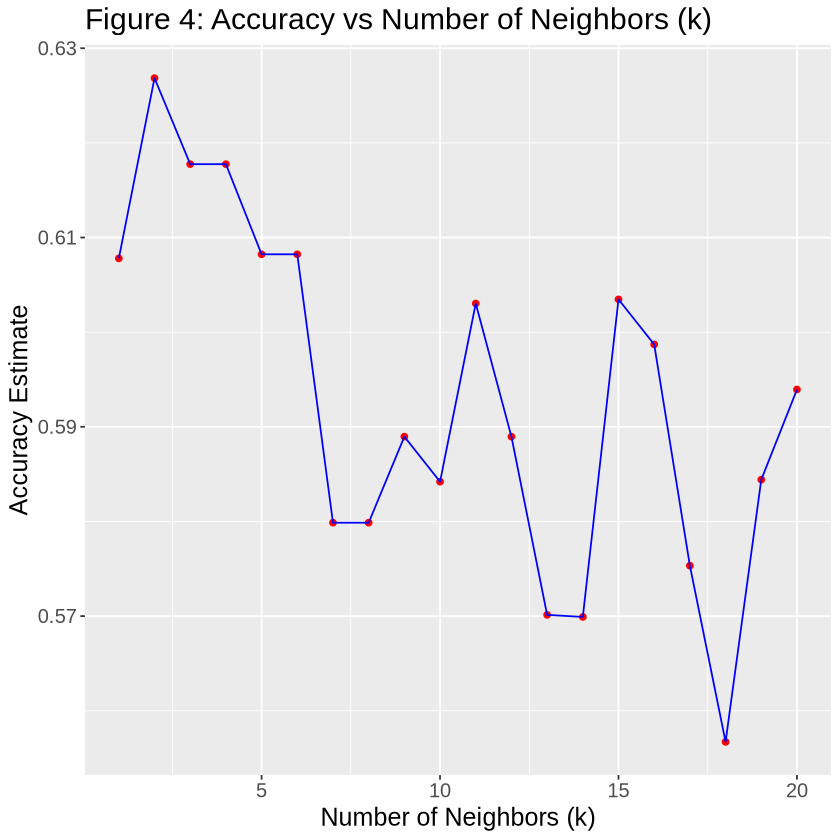

In [11]:
set.seed(2000)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

players_vfold <- vfold_cv(players_training, v = 5, strata = subscribe)

k_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 1))

knn_results <- workflow() |> add_recipe(players_recipe) |> add_model(knn_spec) |> tune_grid(resamples = players_vfold, grid = k_vals) |> collect_metrics()

accuracies <- knn_results |>
                 filter(.metric == 'accuracy')

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) + 
  geom_point(color = "red") + 
  geom_line(color = "blue") +
  labs(
    title = "Figure 4: Accuracy vs Number of Neighbors (k)",
    x = "Number of Neighbors (k)",
    y = "Accuracy Estimate") +
theme(text = element_text(size = 15))

cross_val_plot

With this, we see that K=1 is the value that provides the highest accuracy. With the best k-value determined, we can now finally create our prediction model by fitting our specification and recipe onto our training data.

In [12]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 1) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
  fit(data = players_training)


With our prediction model created, we can now evaluate its performance by making predictions with the testing data to evaluate whether our model correctly classifies the subscription status of the player.

In [13]:
players_test_predictions <- predict(knn_fit, players_testing) |>
  bind_cols(players_testing)

confusion <- players_test_predictions |>
             conf_mat(truth = subscribe, estimate = .pred_class)

confusion

players_test_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

players_test_predictions |>
  precision(truth = subscribe, estimate = .pred_class, event_level = "first")

players_test_predictions |>
  recall(truth = subscribe, estimate = .pred_class, event_level = "first")

          Truth
Prediction FALSE TRUE
     FALSE    33   23
     TRUE      3   13

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6388889


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.5892857


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.9166667


15 cases were correctly identified as TRUE, and 3 cases were mistakenly identified as TRUE, 33 cases were correctly identified as FALSE, and 21 cases were mistakenly identified as FALSE.


The overall accuracy of the model is 66%, its precision is 61% and recall is 92%. The data only makes the correct prediction 67% of the time. The value of precision tells that out of all the FALSE predictions, only 61% was truly FALSE. The recall value tells us that 91% of the FALSE predictions were correctly classified as false. These metrics are not unacceptably low, as the accuracy is still substantially better than a coin flip. This suggests that the player's total hours played and age could potentially predict their subscription status with reasonable accuracy, as we expected. This matches our schema that dedicated young people who have the free time to splurge on hobbies are more likely to show interest in a related newsletter. However, the evaluation and impact of this model are highly dependent on the environment it is used. In a business context, the use of this model to dictate marketing decisions can be helpful. The accuracy is better than a simple 50-50 guess and thus is substantial, moreover, the model performs well in excluding disinterested users. With this, marketing decisions can be made about demographics that should not be targeted with advertisements -- resulting in money and resources delegated to higher-potential customers. However, this model suffers as the low precision might incorrectly exclude interested demographics. Therefore, the findings of this model are meaningful, but should be applied with caution. In conclusion, this model has a high potential impact by saving companies millions of dollars by narrowing their target audience. Nevertheless, its low accuracy and precision minimize the said impact, as highly confident conclusions can not be drawn.

These findings can lead to future questions like:
- Along with age and total hours played, is there a third predictor, such as gender or income, that will increase the predictive capabilities of the model?
- If companies are more concerned with accurately identifying interested users over losing potential ones, can we tune our dataset to optimize a metric?
- Is it ethical? If the model indicates that young people are more likely to subscribe, will such targeting be predatory?